# Figure 03: Hysteretic bahaviour

In this notebook, hysteretic behaviour shown in Figure 3 in

[Beg *et al.* Stable and manipulable Bloch point. *Scientific Reports*, **9**, 7959 (2019)](https://doi.org/10.1038/s41598-019-44462-2).

is simulated.

We need to simulate hysteretic behaviour of a $150 \,\text{nm}$ disk, which consists of two layers with different sign of Dzyaloshinskii-Moriya constant $D$. The bottom layer with $D<0$ has $20 \,\text{nm}$ thickness, whereas the top layer with $D>0$ has $10 \,\text{nm}$ thickness. We start by importing the necessary modules and creating the mesh with two regions.

First we start by setting up the system object.

In [1]:
import oommfc as oc
import discretisedfield as df
%matplotlib inline

d = 150e-9
hb = 20e-9
ht = 10e-9
cell = (5e-9, 5e-9, 2.5e-9)
n = (31, 31, 5)
regions = {'r1': df.Region(p1=(-d/2, -d/2, -hb), p2=(d/2, d/2, 0)),
           'r2': df.Region(p1=(-d/2, -d/2, 0), p2=(d/2, d/2, ht))}
p1 = (-d/2, -d/2, -hb)
p2 = (d/2, d/2, ht)
mesh = oc.Mesh(p1=p1, p2=p2, n=n, regions=regions)

D = {'r1': 1.58e-3, 'r2': -1.58e-3, 'r1:r2': 1.58e-9}
Ms = 3.84e5
A = 8.78e-12

def Ms_fun(pos):
    x, y, z = pos
    if x**2 + y**2 <= (d/2)**2:
        return Ms
    else:
        return 0

system = oc.System(name='bloch-point')
system.hamiltonian = oc.Exchange(A=A) + oc.DMI(D=D, crystalclass='T') + oc.Demag()
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)

And finally we simulate and plot the hysteresis loop.

In [2]:
import numpy as np

# Create an array of external fields for which the system is relaxed.
Bmax = 1  # maximum field in hysteresis (T)
dB = 0.1  # field step (T)
B_array = np.concatenate([np.arange(Bmax, -Bmax, -dB),
                          np.arange(-Bmax, Bmax+1e-12, dB)])

md = oc.MinDriver()
system.hamiltonian += oc.Zeeman(H=(0, 0, 0))
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms_fun)
mz = []
c = 1
for B in B_array:
    system.hamiltonian.zeeman.H = (0, 0, B/oc.consts.mu0)
    md.drive(system, overwrite=True)
    if abs(B) < 1e-3:
        system.m.write(f'm{c}.omf')
        c += 1
    mz.append(system.m.average[2])

2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.0 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.0 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.0 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.0 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.2 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.3 s)
2019/11/26 14:32: Running OOMMF (bloch-point.mif) ... (1.0 s)
2019/11/26 14:33: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:33: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:33: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:33: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:33: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/26 14:33: Running OOMMF (bloch-point.mif) ... (1.1 s)
2019/11/

The hysteresis loop is

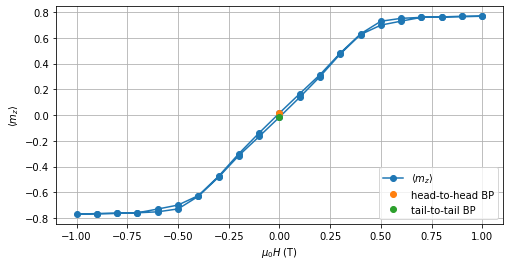

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

mz = np.array(mz)/Ms

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(B_array, mz, 'o-', label=r"$\langle m_{z} \rangle$")
ax.plot(0, mz[10], 'o', label='head-to-head BP')
ax.plot(0, mz[30], 'o', label='tail-to-tail BP')
plt.xlabel(r"$\mu_{0}H$ (T)")
plt.ylabel(r"$\langle m_{z} \rangle$")
plt.legend(loc=4)
plt.grid()

The magnetisation fields in the cross section for $B=0$ are:

In [8]:
m1 = df.Field.fromfile('m1.omf')
m1.plane('y').k3d_vectors(color_field=m1.z, head_size=20)

Output()

In [9]:
m2 = df.Field.fromfile('m2.omf')
m2.plane('y').k3d_vectors(color_field=m1.z, head_size=20)

Output()